In [92]:
import pandas as pd
df = pd.read_csv("avocado.csv")
df["Date"] = pd.to_datetime(df["Date"]) #map coloumns 
albany_df = df[df["region"] == "Albany"]
albany_df = albany_df.set_index("Date") #setting index





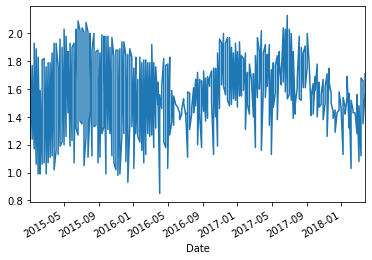

In [93]:

albany_df["AveragePrice"].plot()

In [94]:
#for smoothening graph
#use rolling to 25
albany_df.sort_index(inplace = True)#sorting the index

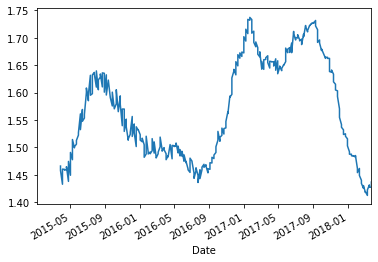

In [98]:
#adding the plot as a coloumn in dataframe
albany_df["Price25"]= albany_df["AveragePrice"].rolling(25).mean()
#plotted the average price to a +-25 of mean value
albany_df["Price25"].plot()

In [99]:
#to generate unique values of a coloumn
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [102]:
#to generate each region as a coloumn and have their "price25" as their values


In [120]:
import pandas as pd
df = pd.read_csv("avocado.csv")
df = df.copy()[df['type'] == 'organic'] #data frame with type = 'organic' to avoid reccursion 
df.sort_values(by = 'Date', ascending = True, inplace =  True)
df.head() 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [121]:
graph_df = pd.DataFrame()

for region in df["region"].unique():
    region_df = df.copy()[df['region'] == region]
    region_df.set_index("Date", inplace = True) #setting index
    region_df.sort_index(inplace = True)#sorting the index
    region_df[f"{ region}_Price25"]= region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_Price25"]]# double square bracket to make graph_df a dataframe
    else:
        graph_df = graph_df.join(region_df[[f"{region}_Price25"]])
        
    
    

In [122]:
graph_df.tail()

,California_Price25,LasVegas_Price25,PhoenixTucson_Price25,BuffaloRochester_Price25,Spokane_Price25,LosAngeles_Price25,Philadelphia_Price25,Boston_Price25,StLouis_Price25,Louisville_Price25,...,Houston_Price25,Chicago_Price25,Plains_Price25,Indianapolis_Price25,SouthCentral_Price25,Columbus_Price25,Albany_Price25,Detroit_Price25,NewOrleansMobile_Price25,NewYork_Price25
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


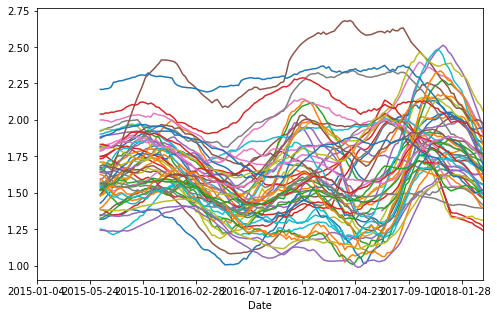

In [131]:

graph_df.plot(legend = False, figsize = (8,5))